<a href="https://colab.research.google.com/github/8MISHRA/Calculus/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Let's Explore Linear Regression
This is a method which is provides approximate estimation for the slope and intercept of a linear equation.
We have some error in the basic formula linear equation derived from any experiment.The approximate equation can be expressed as:
$$y_{i} = m \cdot x_{i} + c + ϵ_{i}$$

From the above equation we have to find the value of m and c by minimizing the error (ϵ).
Expression for sum of erros (SE) is given below which is to be minimized:
$$SE = \sum_{i=1}^{n}(y_{i} - m \cdot x{i} - c)^2$$ where $m$ is the slope and $c$ is the intercept of the equation.
For minimizing this equation to get $m$ and $c$ we have to equate its first derivative with zero as shown:
$$\frac{∂SE}{∂m} = 0  \quad  and \quad \frac{∂SE}{∂c} = 0$$
Using these equation we cam find the value of $m$ and $c$ as follows:

$m = \frac{\overline{xy} - \overline{x}.\overline{y}}{\overline{x^2}-(\overline{x})^2} \quad \quad and \quad \quad c = \overline{y} - m \cdot \overline{x}$ 
Where 
$$\overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i} \quad \quad and \quad \quad \overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_{i} $$




$$ '' \quad LINEAR \quad REGRESSION \quad FOR \quad LINEAR \quad EQUATION \quad '' $$

In [32]:
# Importing some neccessary modules
import matplotlib.pyplot as plt
import math
import random
import plotly.express as px
import numpy as np

In [33]:
# Some inputs from the experiment
n = int(input('Enter the total number of experiment: '))
m = float(input('Enter the value of slope: '))
c = float(input('Enter the value of intercept: '))

Enter the total number of experiment: 150
Enter the value of slope: 5
Enter the value of intercept: 20


In [35]:
# Function for error 
def error(alpha, n):
  '''Returns the list of error values during experiment

  Parameter alpha: A number to manage the fluctuation of error
  Precondition: It must be a number i.e. in (int,float)

  Parameter n: It is the number of ebservation
  precondition: It must be an integer 
  '''

  e_list = []
  
  for _ in range(n):
    e_list.append((random.random()- 0.5) * alpha)
  
  return e_list

In [42]:
# Now it is the turn of the function for slope and intercept 
def minimize(x_list, y_list, n):
  '''
  Returns the value of slope(m) and intercept(c)
  
  Parameter x_list: List of values of inputs
  Precondition: This list must contain int or float values

  Parameter y_list: List of valus of output of the experiment
  Precondition: This list must contain int or float values

  Parameter n: It is the number of experiment
  Precondition: It must be a positive integer
  '''
  assert type(x_list) == list,'Please give inputs in a list'
  assert type(y_list) == list,'Please provide the outputs in a list'
  assert type(n) == int and n>0 , 'n should be a real number of experiment'

  # Accumulators...
  xy = 0
  x = 0
  y = 0
  x_square = 0

  for i in range(n):
    y += y_list[i]
    x += x_list[i]
    x_square += x_list[i] ** 2
    xy += x_list[i] * y_list[i]    
  xyBar = xy / n
  xBar = x / n
  yBar = y / n
  xSquareBar = x_square / n
  xBarSquare = xBar ** 2
  # Calculating values of m and c using above terms in above mentoned formula for m and c.
  m_new = (xyBar - xBar * yBar) / (xSquareBar - xBarSquare)
  c_new = yBar - m * xBar

  return (m_new, c_new)

In [43]:
# Plotting for random x and y values
x_list = [i/10 for i in range(n)]
alpha = 20
err_list = error(alpha, n)
observed_y =[]
for i in range(len(x_list)):
  # Using equation of straight line
  observed_y.append(m * x_list[i] + c + err_list[i])

In [44]:
# values for plotting after minimizing error
y_analytical =[]
new_values = minimize(x_list, observed_y, n)
m = new_values[0]
c = new_values[1]
for i in range(n):
  y_analytical.append(m * x_list[i] + c)

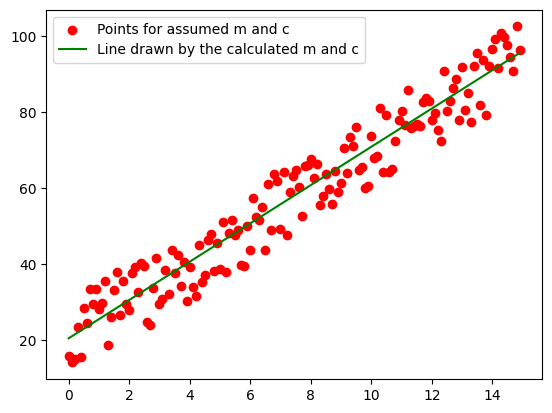

In [45]:
# Let's play with the graph
plt.scatter(x_list, observed_y, label = 'Points for assumed m and c', color='red')
plt.plot(x_list, y_analytical, label = 'Line drawn by the calculated m and c', color = 'green')
plt.legend()
plt.show()


$$''\quad Linear\quad Regression \quad For \quad Exponential \quad Equation''$$
$$y_{i} = y_{i} = β\cdot e^{γx_{i} + ϵ_{i}}$$
To solve this type of equation we have to convert it first into a linear equation by taking its log and then solve it as above linear regression.
$$\log{y_{i}} =  \log{β} + γ\cdot x_{i} + ϵ_{i}$$consider  $ \quad {y_{i}}_{new}= \log{y_{i}}, \quad c = \log{β} \quad and \quad m = γ$

In [46]:
# Initial values of beta and gama
gama = float(input("enter value of gama: "))
beta = float(input("enter value of beta: "))

enter value of gama: 12
enter value of beta: 26


In [47]:
# x_list and y_list to plots for random values of m and c.
x_list = [i / 100 for i in range(n)]
alpha = 0.8   # Error manager.
err_list = error(alpha, n)
observed_y = []
for i in range(n):
    # conveting exponential to straight line and computing value of log(yi) to calculate value of beta and gama.
    observed_y.append(math.log(beta) + gama * x_list[i] + err_list[i])

In [48]:
y_analytical = []
new_values = minimize(x_list, observed_y, n)
gama = new_values[0]
beta = math.exp(new_values[1])
for i in range(n):
    y_analytical.append(beta * (math.exp(gama * x_list[i])))

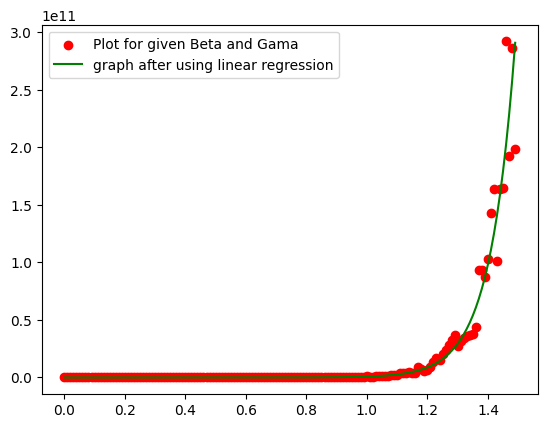

In [49]:
# Let's play with the graph
plt.scatter(x_list, [beta * (math.exp(gama * x_list[i] + err_list[i]))for i in range(n)],label = 'Plot for given Beta and Gama', color='red' )
plt.plot(x_list, y_analytical, label = 'graph after using linear regression', color ='green')
plt.legend()
plt.show()


$$ ''\quad Linear \quad Regression \quad For \quad Polynomial \quad Function \quad ''$$
$$y_{i} = m_{0} + m_{1}x_{i} + m_{2}x_{i}^{2} + m_{3}x_{i}^{3} + m_{4}x_{i}^{4} + .....$$
We have to convert it into multi variable to solve it as per the concept of linear regression.
$$y_{i} = m_{0} + m_{1}x_{1i} + m_{2}x_{2i} + m_{3}x_{3i} .......$$
Where $ \quad x_{3i} = x_{i}^{3},\quad x_{2i} = x_{i}^{2},\quad  x_{3i} = x_{i}^{3} $ and so on ...
Now solution:

In [53]:
# Experiment and getting data of output
degree = int(input('Enter the degree of polynomial: '))
m_value = [float(input(f'Enter value of m_{i}: ')) for i in range(degree + 1)]
x_list = [i / 10 for i in range(n)]
alpha = 1
err_list = error(alpha, n)
observed_y = []
for i in range(n):
  y = m_value[0]
  for j in range(degree):
    y += m_value[j + 1]*x_list[i] ** (j + 1)
  observed_y.append(y + err_list[i])



Enter the degree of polynomial: 5
Enter value of m_0: 14
Enter value of m_1: 46
Enter value of m_2: 625
Enter value of m_3: 58
Enter value of m_4: 43
Enter value of m_5: 48


In [54]:
# calculating value of m's after applying linear regression
x_final = []
matrix = []
c_vector = []
for p in range(degree * 2 + 1):
  sum = 0
  sum1 = 1
  for i in range(n):
    sum1 += observed_y[i] * x_list[i] ** p
    sum += x_list[i] ** p
  matrix.append(sum)
  if p <= degree:
    c_vector.append([sum1])
for i in range(degree + 1):
  if i > degree:
    break
  x_final.append(matrix[ i : degree + i + 1])

In [55]:
# finally cheking closeness between choosen and got values of  m
inverse = np.linalg.inv(x_final)
product = np.dot(inverse, c_vector)
for i in range(degree):
  print(f'Choosen values of m_{i}: ', m_value[i])
  print(f'Calculated values of m_{i}: ', product[i][0])
  print()

Choosen values of m_0:  14.0
Calculated values of m_0:  14.006660461425781

Choosen values of m_1:  46.0
Calculated values of m_1:  46.06239318847656

Choosen values of m_2:  625.0
Calculated values of m_2:  624.9830455780029

Choosen values of m_3:  58.0
Calculated values of m_3:  58.00143527984619

Choosen values of m_4:  43.0
Calculated values of m_4:  42.99996119737625

